In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import io
import regex
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
from scipy import sparse

# Upload Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CayJoBla/EmotionRecognition/master/data/original_data.csv', index_col=0)

In [54]:
tweet_data = df.copy()
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1956967341 to 1753919049
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


In [55]:
pd.unique(tweet_data['sentiment'])

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [56]:
tweet_data.loc[tweet_data["sentiment"]=="empty", "sentiment"] = "sadness"
tweet_data.loc[tweet_data["sentiment"]=="boredom", "sentiment"] = "neutral"
tweet_data.loc[tweet_data["sentiment"]=="hate", "sentiment"] = "anger"
tweet_data.loc[tweet_data["sentiment"]=="fun", "sentiment"] = "enthusiasm"
pd.unique(tweet_data['sentiment'])

array(['sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love',
       'anger', 'happiness', 'relief'], dtype=object)

In [57]:
# Define identifiers
urls = r"http:[^\s]+|w{3}\.[^\s]+|[\w]+\.[\w]{3}[/\w]*"
users = r"@(\w){1,}"
tags = r"#(\w){1,}"
symbols = r"[&[\w]+;|~$/%/^/&/*-/+/=/\/|///?:;\"<>,]|[.]+"

# Parse unique identifiers
tweet_data['num_urls'] = tweet_data['content'].apply(lambda text: len(regex.findall(urls, text.lower()))).values
tweet_data['content_parsed'] = tweet_data['content'].apply(lambda text: regex.sub(urls, "", text)).values
tweet_data['num_pings'] = tweet_data['content_parsed'].apply(lambda text: len(regex.findall(users, text.lower()))).values
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: regex.sub(users, "", text)).values
tweet_data['num_tags'] = tweet_data['content_parsed'].apply(lambda text: len(regex.findall(tags, text.lower()))).values
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: regex.sub(tags, "", text)).values
tweet_data['#!'] = tweet_data['content_parsed'].str.count('!')
tweet_data['#?'] = tweet_data['content_parsed'].str.count('\\?')
tweet_data['#...'] = tweet_data['content_parsed'].str.count('\\.{2,}')
tweet_data['Upper/Lower ratio'] = (tweet_data['content_parsed'].str.findall(r'[A-Z]').str.len()+1) / (tweet_data['content_parsed'].str.findall(r'[a-z]').str.len()+1)
tweet_data['Number of Words'] = tweet_data['content_parsed'].apply(lambda n: len(n.split()))
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: text.replace(';', '; '))
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: text.replace('&', ' &'))
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: text.replace('_', ' '))
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: text.replace('ï', ''))
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: text.replace('½', ''))
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: regex.sub(symbols, " ", text)).values
tweet_data['content_parsed'] = tweet_data['content_parsed'].apply(lambda text: regex.sub(r"'", "", text)).values

words = r"[\w]+"
tweet_data['words'] = tweet_data['content_parsed'].apply(lambda text: regex.findall(words, text.lower())).values
tweet_data["avg word length"] = tweet_data['words'].apply(lambda word_array: np.mean([len(word) for word in word_array]))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


1 14374 15.661168361884368
[31 26  1 ...  1  1  1]


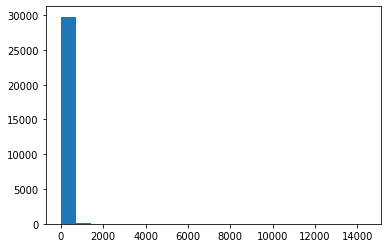

In [58]:
#tweet_data = tweet_data.drop(columns=['content_parsed'])
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweet_data["content_parsed"].values)

total_counts = np.sum(X, axis=0)
print(np.min(total_counts), np.max(total_counts), np.mean(total_counts))
print(np.array(total_counts)[0])
counts = np.array(total_counts)[0]
plt.hist(counts, bins=20)
plt.show()

(array([5.661e+03, 5.800e+01, 1.600e+01, 9.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([5.000000e+00, 7.234500e+02, 1.441900e+03, 2.160350e+03,
        2.878800e+03, 3.597250e+03, 4.315700e+03, 5.034150e+03,
        5.752600e+03, 6.471050e+03, 7.189500e+03, 7.907950e+03,
        8.626400e+03, 9.344850e+03, 1.006330e+04, 1.078175e+04,
        1.150020e+04, 1.221865e+04, 1.293710e+04, 1.365555e+04,
        1.437400e+04]),
 <a list of 20 Patch objects>)

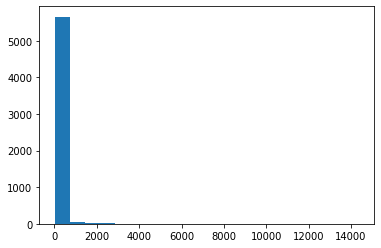

In [59]:
plt.hist(counts[counts >= 5], bins=20)

[31 26  1 ...  1  1  1]
['zq' 'zs' 'zsg' 'zu' 'zuccini' 'zuljin' 'zulu' 'zum' 'zumba' 'zune' 'zur'
 'zwarte' 'zydrate' 'zyrtec' 'zzz' 'zzzz' 'zzzzy' 'zzzzz' 'zzzzzzz'
 'zzzzzzzzzzzzzzz']
['00' '000' '04' ... 'zone' 'zoo' 'zune']
000th 1
100000000000000000000000000000000000 2
01 3
03 4
12am 5
04 6
100th 7
06 8
05 9
1000 10
08 11
3am 12
27 13
2morrow 14
4am 15
26 16
140 17
2moro 18
amazon 19
19 20


(array([1.794e+03, 5.500e+01, 1.700e+01, 8.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([   21.  ,   738.65,  1456.3 ,  2173.95,  2891.6 ,  3609.25,
         4326.9 ,  5044.55,  5762.2 ,  6479.85,  7197.5 ,  7915.15,
         8632.8 ,  9350.45, 10068.1 , 10785.75, 11503.4 , 12221.05,
        12938.7 , 13656.35, 14374.  ]),
 <a list of 20 Patch objects>)

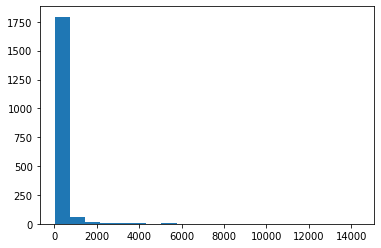

In [60]:
temp = np.array(total_counts)[0]
names = vectorizer.get_feature_names_out()
print(temp)
print(names[-20:])
print(names[temp >= 5])
for i in range(20):
    ind = np.argmin(temp)
    print(names[ind], temp[ind])
    mask = temp != temp[ind]
    temp = temp[mask]
    names = names[mask]
plt.hist(temp[temp >= 5], bins=20)

In [63]:
X = vectorizer.fit_transform(tweet_data["content_parsed"].values)
X = csc_matrix(X)
print(X.shape)

counts = np.array(total_counts)[0]
names = vectorizer.get_feature_names_out()
for i in range(5):
    ind = np.argmax(counts)
    print(names[ind], counts[ind])
    mask = np.ones_like(counts, dtype=bool)
    mask[ind] = False
    counts = counts[mask]
    names = names[mask]
    keep_ind = np.delete(np.arange(len(counts)), ind)
    X = X[:,keep_ind]

X = X[:,counts >= 5]
print(X.shape)
names = names[counts >= 5]
#X = X.toarray()

(40000, 29888)
to 14374
the 12970
my 8073
and 7457
you 7095
(40000, 5761)


In [64]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1956967341 to 1753919049
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sentiment          40000 non-null  object 
 1   content            40000 non-null  object 
 2   num_urls           40000 non-null  int64  
 3   content_parsed     40000 non-null  object 
 4   num_pings          40000 non-null  int64  
 5   num_tags           40000 non-null  int64  
 6   #!                 40000 non-null  int64  
 7   #?                 40000 non-null  int64  
 8   #...               40000 non-null  int64  
 9   Upper/Lower ratio  40000 non-null  float64
 10  Number of Words    40000 non-null  int64  
 11  words              40000 non-null  object 
 12  avg word length    39899 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 4.3+ MB


In [67]:
tweet_data = tweet_data.drop(columns=["words","content_parsed","content"])
data = sparse.hstack((tweet_data.values, X.astype(object)), dtype=np.object_)

In [72]:
print(data.shape)
sparse.save_npz("cleaned_data.npz", data)

(40000, 5771)


In [69]:
tweet_data

,sentiment,num_urls,num_pings,num_tags,#!,#?,#...,Upper/Lower ratio,Number of Words,avg word length
tweet_id,,,,,,,,,,
1956967341,sadness,0,1,0,0,0,0,0.016129,17,3.812500
1956967666,sadness,0,0,0,0,0,2,0.045455,10,4.000000
1956967696,sadness,0,0,0,0,0,2,0.074074,3,6.750000
1956967789,enthusiasm,0,0,0,1,0,0,0.192308,7,4.142857
1956968416,neutral,0,1,0,0,0,0,0.054545,14,4.000000
...,...,...,...,...,...,...,...,...,...,...
1753918954,neutral,0,1,0,0,0,0,1.000000,0,NaN
1753919001,love,0,0,0,0,0,0,0.238095,6,4.000000
1753919005,love,0,0,0,1,0,0,0.043956,25,3.720000


In [ ]:
tweet_data.to_csv("cleaned_data.csv")